<a href="https://colab.research.google.com/github/NAZEUR/TensorFlow-Basic-to-Advanced---100-Projects-in-100-Days/blob/main/Linear_Regression_with_TensorFlow_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Kode ini adalah sebuah proyek dasar machine learning untuk mengajarkan komputer menemukan pola garis lurus. Tujuannya adalah membuat model yang bisa menebak hubungan matematis y = 3x + 2 hanya dengan melihat contoh data.

#Import Library

In [3]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

#Data Collection & Preparation

In [4]:
# Generate synthetic data
X_data = np.linspace(-10, 10, 200).reshape(-1, 1)  # 200 values, reshaped for TF
true_w, true_b = 3.0, 2.0
y_data = true_w * X_data + true_b + np.random.randn(*X_data.shape) * 2.0 # Add some noise

# Split data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X_data, y_data, test_size=0.2, random_state=42)

print(f"Jumlah data latih: {len(X_train)}")
print(f"Jumlah data uji: {len(X_test)}")

Jumlah data latih: 160
Jumlah data uji: 40


#Model Building

In [5]:
# Create a simple sequential model with one Dense unit
model = tf.keras.Sequential([
    # Satu neuron akan belajar weight (kemiringan) dan bias (intersep)
    tf.keras.layers.Dense(units=1, input_shape=[1])
])

# Show the arsitectur model
model.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 1)              │             2 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2 (8.00 B)

 Trainable params: 2 (8.00 B)

 Non-trainable params: 0 (0.00 B)

#Model Training

In [10]:
optimizer = tf.keras.optimizers.Adam(learning_rate=0.01)
model.compile(optimizer=optimizer, loss='mse')

history = model.fit(X_train, y_train, epochs=500, verbose=0, validation_data=(X_test, y_test))


#Model Evaluation

In [7]:
# Evaluate the model on the unseen test data
test_loss = model.evaluate(X_test, y_test, verbose=0)
print(f"\nLoss pada Data Uji (MSE): {test_loss:.4f}")

# Compare the learned weights with the true weights
learned_w, learned_b = model.layers[0].get_weights()
print(f"Weight yang dipelajari: {learned_w[0][0]:.4f} (Asli: {true_w})")
print(f"Bias yang dipelajari: {learned_b[0]:.4f} (Asli: {true_b})")


Loss pada Data Uji (MSE): 155.6512
Weight yang dipelajari: 0.6624 (Asli: 3.0)
Bias yang dipelajari: 0.2941 (Asli: 2.0)


# Model Deployment

In [8]:
# Save the trained model to a file
model.save('linear_regression_model.h5')
print("\nModel telah disimpan ke 'linear_regression_model.h5'")

# Anda bisa memuatnya kembali nanti dengan:
# loaded_model = tf.keras.models.load_model('linear_regression_model.h5')


Model telah disimpan ke 'linear_regression_model.h5'


#Visualisasi

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 


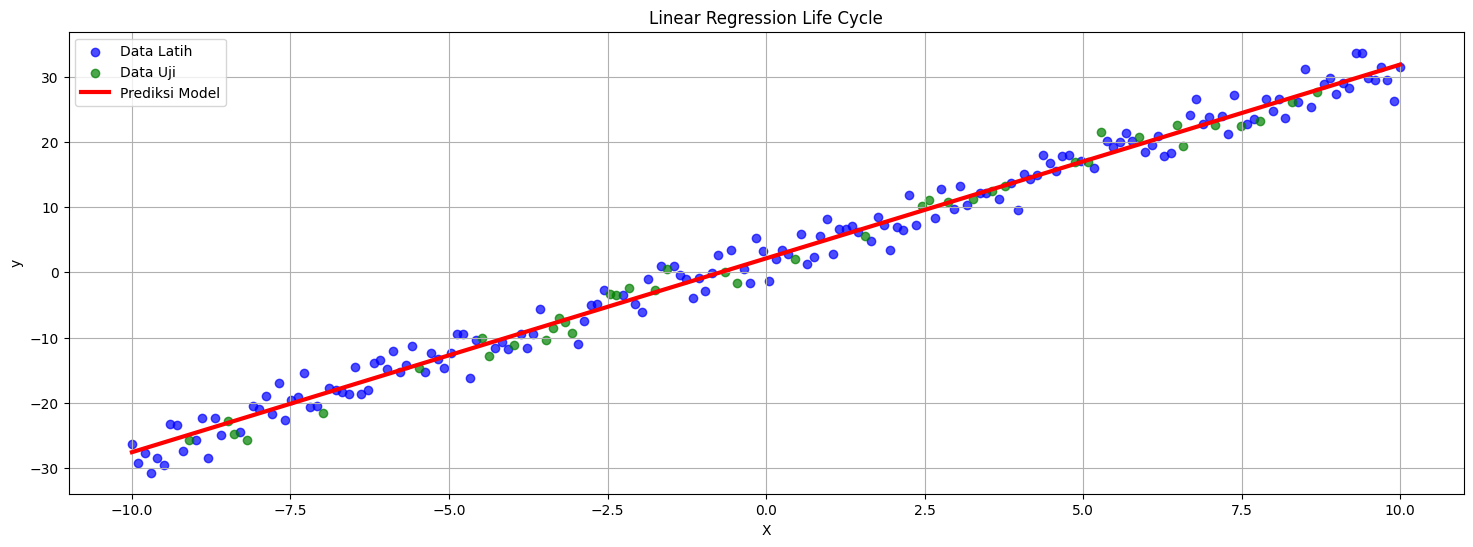

In [11]:
# Predict values using the trained model
predictions = model.predict(X_data)

# Plot training data, test data, and the model's prediction line
plt.figure(figsize=(18, 6))
plt.scatter(X_train, y_train, label='Data Latih', color='blue', alpha=0.7)
plt.scatter(X_test, y_test, label='Data Uji', color='green', alpha=0.7)
plt.plot(X_data, predictions, color='red', linewidth=3, label='Prediksi Model')
plt.title("Linear Regression Life Cycle")
plt.xlabel("X")
plt.ylabel("y")
plt.legend()
plt.grid(True)
plt.show()